<h1 style="
    font-family: 'Arial', sans-serif;
    font-size: 2.5em;
    background: linear-gradient(90deg, #FF7F50, #1E90FF);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    text-align: center;
    text-shadow: 2px 2px 5px rgba(0, 0, 0, 0.3);
    margin-bottom: 20px;
    padding: 10px;
">
  Import Libraries
</h1>


In [1120]:
import pandas as pd        
import numpy as np

import matplotlib.pyplot as plt  
import seaborn as sns            

from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics

# Multicollinearity and Statistical Analysis
from statsmodels.stats.outliers_influence import variance_inflation_factor 

# Deep Learning Libraries
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import layers                    
import keras                                
from keras.models import load_model         


import joblib 

from sdv.single_table import GaussianCopulaSynthesizer
from sdv.metadata import Metadata 
from sdv.evaluation.single_table import run_diagnostic, evaluate_quality

<h1 style="
    font-family: 'Arial', sans-serif;
    font-size: 2.5em;
    background: linear-gradient(90deg, #FF7F50, #1E90FF);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    text-align: center;
    text-shadow: 2px 2px 5px rgba(0, 0, 0, 0.3);
    margin-bottom: 20px;
    padding: 10px;
">
    Loading and Exploring the dataset
</h1>


In [1121]:
# Loading the data 
df = pd.read_csv("adm_data.csv")

In [1122]:
df.head(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [1123]:
# In this notebook, I will build and train ANN to predict the chance of admission score. This Dataset has 8 features.
# My goal is to train a model that can predict the chance of admission based on these features.
# This is a regression task because adission chance is a continuous value between 0 and 1.  
# I am going to build ANN model in two frameworks,  TensorFlow and PyTorch and compare their performaning with classical ML model.
# But First of all, I need to explore the data and preprocess it.

In [1124]:
# check the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [1125]:
# Dataset is very small, it has only 400 rows and columns.

In [1126]:
# Removing the "Serial No", this is useless column and does not mean anything.S
df = df.drop("Serial No.", axis=1)

In [1127]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


<h1 style="
    font-family: 'Arial', sans-serif;
    font-size: 2.5em;
    background: linear-gradient(90deg, #FF7F50, #1E90FF);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    text-align: center;
    text-shadow: 2px 2px 5px rgba(0, 0, 0, 0.3);
    margin-bottom: 20px;
    padding: 10px;
">
    Visualization
</h1>


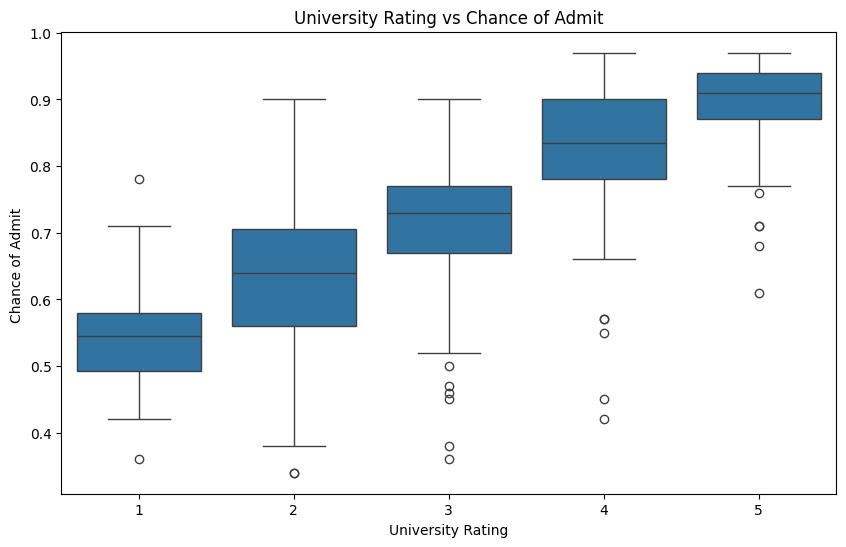

In [1128]:
# Visualizing th University Rating vs chance of admit column
plt.figure(figsize=(10, 6))
sns.boxplot(x="University Rating", y="Chance of Admit ", data=df)
plt.title("University Rating vs Chance of Admit")
plt.show()

**To get admission the top universities is hard.**

<Axes: >

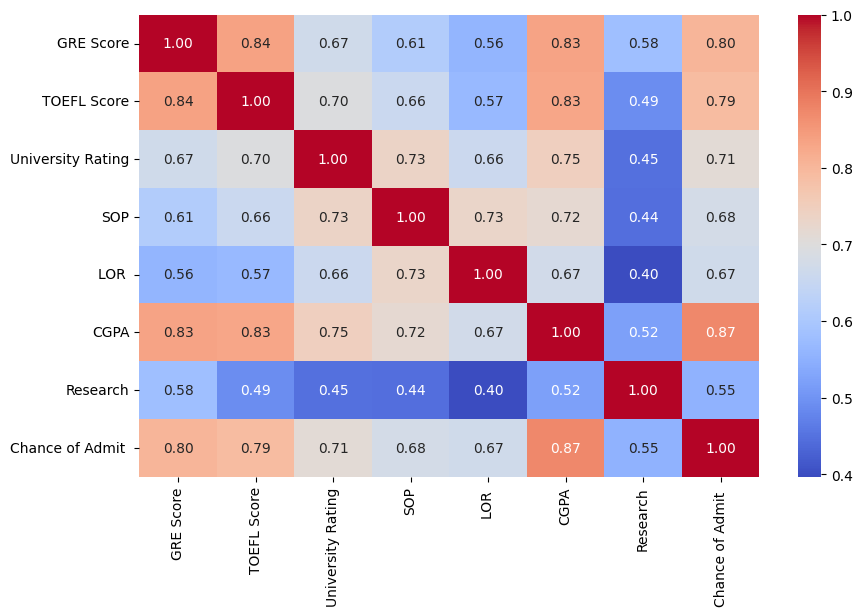

In [1129]:
# Let's check the correlation between the features.
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')

In [1130]:
# GRE scores, Toefl scores and CGPA scores have higher correlation with the chance of admission.


<h1 style="
    font-family: 'Arial', sans-serif;
    font-size: 2.5em;
    background: linear-gradient(90deg, #FF7F50, #1E90FF);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    text-align: center;
    text-shadow: 2px 2px 5px rgba(0, 0, 0, 0.3);
    margin-bottom: 20px;
    padding: 10px;
">
    Data Preprocessing
</h1>


In [1131]:
# I need to  multiply the chance of admit column by 100 to make it easier to understand
df["Chance of Admit "] = df["Chance of Admit "] * 100

In [1132]:
# My dataset is small, ANN model can be easily overfitted.
# I will use SDV to generate data. 
# Creating Metadata object.
metadata = Metadata.detect_from_dataframe(df)
# I am going to use Gaussian Colula synthesizer method to generate data.
synthesizer = GaussianCopulaSynthesizer(metadata)
synthesizer.fit(df)
new_df  = synthesizer.sample(num_rows=1000)
new_df.to_csv('adm_data_synthesized.csv', index=False)

d:\ML&DE\Deep_Learning\.venv\lib\site-packages\sdv\single_table\base.py:128: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(


In [1133]:
# Evaluation of synthesized data 
run_diagnostic(new_df, df, metadata)
# Evaluating the quality of synthesized data
quality = evaluate_quality(new_df, df, metadata)
print(f'Quality of synthesized data: {quality}')
quality.get_details(property_name='Column Shapes')
# I got the code structure from the SDV documentation.
# https://docs.sdv.dev/sdv

Generating report ...

(1/2) Evaluating Data Validity: |██████████| 8/8 [00:00<00:00, 3967.18it/s]|
Data Validity Score: 99.88%

(2/2) Evaluating Data Structure: |██████████| 1/1 [00:00<00:00, 710.06it/s]|
Data Structure Score: 100.0%

Overall Score (Average): 99.94%

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 8/8 [00:00<00:00, 1221.23it/s]|
Column Shapes Score: 93.92%

(2/2) Evaluating Column Pair Trends: |██████████| 28/28 [00:00<00:00, 309.90it/s]|
Column Pair Trends Score: 82.94%

Overall Score (Average): 88.43%

Quality of synthesized data: <sdmetrics.reports.single_table.quality_report.QualityReport object at 0x000001F4199DA620>


,Column,Metric,Score
0,GRE Score,KSComplement,0.9505
1,TOEFL Score,KSComplement,0.9695
2,University Rating,TVComplement,0.9565
3,SOP,KSComplement,0.8760
4,LOR,KSComplement,0.8685
5,CGPA,KSComplement,0.9665
6,Research,TVComplement,0.9905
7,Chance of Admit,KSComplement,0.9360


In [1134]:
# what I can see from the column shapes, SOP and LOR got lower quality scores than other columns.

In [1135]:
# Loading the synthesized data 
synth_df = pd.read_csv('adm_data_synthesized.csv')

In [1136]:
synth_df.head(5)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,329,113,3,4.4,3.1,9.24,1,90.104658
1,307,99,3,4.1,3.1,7.90,1,55.250789
2,332,110,2,3.9,4.2,8.93,1,85.204688
3,339,119,4,5.0,5.0,9.64,1,93.628258
4,323,114,5,4.5,4.8,9.04,1,84.447442


In [1137]:
# Round the 'Chance of Admit ' column to 2 decimal places
synth_df['Chance of Admit '] = synth_df['Chance of Admit '].round(1)

In [1138]:
synth_df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,316.302000,107.122000,3.044000,3.325400,3.401100,8.582160,0.557000,71.854900
std,11.749078,6.180721,1.182989,1.190904,1.056525,0.595618,0.496989,15.034572
min,290.000000,92.000000,1.000000,1.000000,1.400000,7.000000,0.000000,34.100000
25%,307.000000,103.000000,2.000000,2.400000,2.500000,8.180000,0.000000,61.075000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.590000,1.000000,73.600000
75%,326.000000,112.000000,4.000000,4.400000,4.300000,9.022500,1.000000,84.200000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,97.000000


In [1139]:
# I compered the statistics of the synthesized data with the original data.
# There is not big difference between the statistics of the synthesized data and the original data.

In [1140]:
# Picking up the target value and features
X = synth_df.drop('Chance of Admit ', axis=1)
y = synth_df['Chance of Admit ']

In [1141]:
# Feature selection:

# My dataset is combined of numerical values and categorical values, so mutual_info_regression can be a good choice 
selector = SelectKBest(score_func=mutual_info_regression, k='all')
selector.fit(X, y)

# Getting the scores of the features
feature_scores = pd.DataFrame({'Feature': X.columns,'Score': selector.scores_
               }).sort_values(by='Score', ascending=False)

feature_scores



,Feature,Score
5,CGPA,0.780417
1,TOEFL Score,0.567706
0,GRE Score,0.533091
4,LOR,0.208216
3,SOP,0.179846
6,Research,0.063031
2,University Rating,0.054602


In [1142]:
# CGPA , TOEFL Score and GRE Score have higher impact on the chance of admission

In [1143]:
# CALCULATING THE VIF:

# I need to create a new dataframe for storing the features and their VIF values.
vif_data = pd.DataFrame()
# Adding the features's names.
vif_data['feature'] = synth_df.columns
# Using thr list comperhension
vif_data['VIF'] = [variance_inflation_factor(synth_df.values, i ) for i in range(len(synth_df.columns))]
vif_data = vif_data.sort_values(by='VIF', ascending=False)
vif_data


,feature,VIF
0,GRE Score,1380.506588
5,CGPA,1271.163618
1,TOEFL Score,1231.535961
7,Chance of Admit,86.284236
4,LOR,19.893115
3,SOP,15.598441
2,University Rating,7.755101
6,Research,2.533516


In [1144]:
# GRE Score, CGPA and TOEFL Score have high VIF values, which means they are highly correlated
# There is two ways to deal with this issue, drop the features or combine them into one features.
# I am going to combine them into one feature, I can extract the score of them from fearure_scores by isin function.
# isin filters the data based on the condition.
# # I pick up the scores of GRE Score, TOEFL Score and CGPA from the feature_scores dataframe. 
scores = feature_scores[feature_scores['Feature'].isin(['GRE Score', 'TOEFL Score', 'CGPA'])]['Score']
scores


5    0.780417
1    0.567706
0    0.533091
Name: Score, dtype: float64

In [1145]:
# After extracting the scores, calculating the total score
total_score = scores.sum()
total_score

np.float64(1.8812146407360282)

In [1146]:
# Now I can find the weight for each feature
weights = scores / total_score
weights

5    0.414848
1    0.301776
0    0.283376
Name: Score, dtype: float64

In [1147]:
# Now I can create a new feature and combine the scores of GRE Score, TOEFL Score and CGPA based on their weights.
synth_df['adm_score'] = (synth_df['CGPA'] * weights[5] + synth_df['TOEFL Score'] * weights[1] + synth_df['GRE Score'] * weights[0]).round(2)

In [1148]:
# Since I have created a new column "Admision Score" I will drop the columns "GRE Score", "TOEFL Score" and "CGPA"
synth_df= synth_df.drop(['GRE Score', 'TOEFL Score', 'CGPA'], axis=1)
synth_df.head()

,University Rating,SOP,LOR,Research,Chance of Admit,adm_score
0,3,4.4,3.1,1,90.1,131.16
1,3,4.1,3.1,1,55.3,120.15
2,2,3.9,4.2,1,85.2,130.98
3,4,5.0,5.0,1,93.6,135.97
4,5,4.5,4.8,1,84.4,129.68


In [1149]:
# I am going the  save the synthesized data to a CSV file. 
# later I wiull use this data to classical ML models to compare its performance with ANN model.
synth_df.to_csv('Admission_data.csv', index=False)

In [1150]:
# Load the data synthetic data
data = pd.read_csv("Admission_data.csv")

In [1151]:
data.head()

,University Rating,SOP,LOR,Research,Chance of Admit,adm_score
0,3,4.4,3.1,1,90.1,131.16
1,3,4.1,3.1,1,55.3,120.15
2,2,3.9,4.2,1,85.2,130.98
3,4,5.0,5.0,1,93.6,135.97
4,5,4.5,4.8,1,84.4,129.68


In [1152]:
# Define the feature set (X) and the target (y)
X = data.drop(columns=["Chance of Admit "], axis=1)
y = data["Chance of Admit "]

In [1153]:
# Scaling the features 
sc = MinMaxScaler()
sc.fit(X)
X = sc.transform(X) 

In [1154]:
# Splitting the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=101)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=101)

In [1155]:
print(f"Training data samples: {len(X_train)}")
print(f"Test data samples: {len(X_test)}")
print(f"Validation data samples: {len(X_val)}")

print(f"X_train shape: {X_train.shape}")

Training data samples: 800
Test data samples: 100
Validation data samples: 100
X_train shape: (800, 5)


<h2><center>Building the ANN model</center><h2>

In [1156]:
# In this part, I am gonna build ANN model using keras, the model is initialized using the Sequential.
# The input layer, two hidden layers and the output layer. 
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.05),
    layers.Dense(16, activation='relu'),
    layers.Dense(1)
])

optimizer = keras.optimizers.Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

model.summary()

Model: "sequential_38"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_141 (Dense)               │ (None, 64)             │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_81 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_142 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_82 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_143 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_144 (Dense)               │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,009 (11.75 KB)

 Trainable params: 3,009 (11.75 KB)

 Non-trainable params: 0 (0.00 B)

<h1 style="
    font-family: 'Arial', sans-serif;
    font-size: 2.5em;
    background: linear-gradient(90deg, #FF7F50, #1E90FF);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    text-align: center;
    text-shadow: 2px 2px 5px rgba(0, 0, 0, 0.3);
    margin-bottom: 20px;
    padding: 10px;
">
    Train the Neural network with your data
</h1

In [1157]:
# Fit the model on training data, using validation data for evaluation, with specified callbacks
history = model.fit(x=X_train, y=y_train, epochs=300, batch_size=64, validation_data=(X_val, y_val))


Epoch 1/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 5342.4585 - mae: 71.5725 - val_loss: 5709.5952 - val_mae: 73.9781
Epoch 2/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5356.3545 - mae: 71.6221 - val_loss: 5692.2612 - val_mae: 73.8637
Epoch 3/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5326.2783 - mae: 71.4709 - val_loss: 5664.1851 - val_mae: 73.6799
Epoch 4/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5364.9380 - mae: 71.7254 - val_loss: 5620.3462 - val_mae: 73.3925
Epoch 5/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5276.0498 - mae: 71.1055 - val_loss: 5562.0898 - val_mae: 73.0077
Epoch 6/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5191.9707 - mae: 70.5394 - val_loss: 5479.7148 - val_mae: 72.4600
Epoch 7/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5068.9146 - mae: 69.6892 - val_loss: 5358.4043 - val_mae: 71.6460
Epoch 8/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4786.2881 - mae: 67.5536 - val_loss: 5176.5938 - val_mae: 70.4078

In [442]:
# save the model
model.save('Admission_model.keras')

<h1 style="
    font-family: 'Arial', sans-serif;
    font-size: 2.5em;
    background: linear-gradient(90deg, #FF7F50, #1E90FF);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    text-align: center;
    text-shadow: 2px 2px 5px rgba(0, 0, 0, 0.3);
    margin-bottom: 20px;
    padding: 10px;
">
    Evaluating Model
</h1

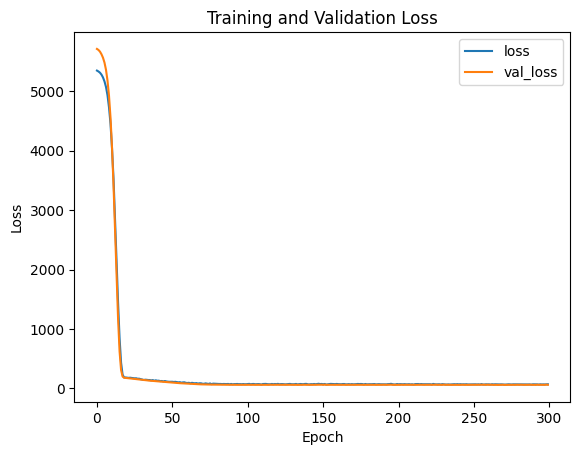

In [1158]:
# Visualize the training and validation loss
losses = pd.DataFrame(history.history)
losses[['loss', 'val_loss']].plot()
plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

## <span style="color: #20C997;">Personal Analysis</span>
The training and validation losses get smaller and stay steady after 200 epochs. This means the model is learning well and works well on new data.

In [707]:
# Load the best saved model from the file 'best_model.regression2.keras'
model = load_model('best_model.regression2.keras')

In [1159]:
# compare the final model loss/evaluation values
print("Test data evaluation:")
print(model.evaluate(X_test, y_test, verbose=0))
print("\nTrain data evaluation:")
print(model.evaluate(X_train, y_train, verbose=0))

Test data evaluation:
[45.48646926879883, 5.4574713706970215]

Train data evaluation:
[49.038734436035156, 5.588372230529785]


## <span style="color: #20C997;">Personal Analysis</span>
Train loss  is  better than test loss , showing good learning with no overfitting.

In [1160]:
test_predictions = model.predict(X_test)

# reshape the data for easier comparison table
test_predictions = pd.Series(test_predictions.flatten())
pred_df = pd.DataFrame(np.asarray(y_test), columns=['Test True Y'])
pred_df = pd.concat([pred_df.reset_index(drop=True), test_predictions.reset_index(drop=True)], axis=1)
pred_df.columns = ['Test True Y', 'Model Predictions']

pred_df.head(9)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


,Test True Y,Model Predictions
0,74.7,70.510963
1,78.8,72.083687
2,53.4,45.137653
3,83.8,73.165138
4,69.1,71.573097
5,74.8,71.977585
6,55.7,54.262341
7,69.0,74.337822
8,85.8,92.028786


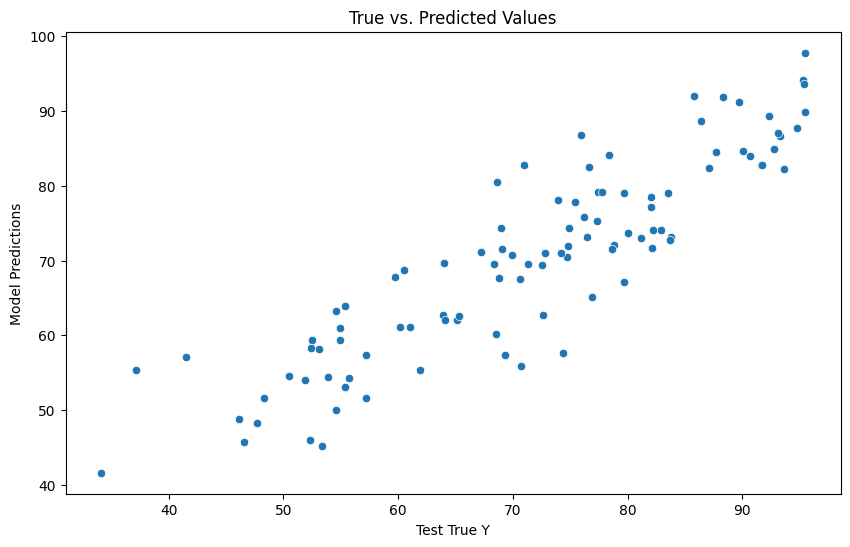

In [1161]:
# Create a scatter plot with a regression line  and true vs. predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Test True Y', y='Model Predictions', data=pred_df)
plt.title("True vs. Predicted Values")
plt.show()


## <span style="color: #20C997;">Personal Analysis</span>
The plot shows true values compared to predicted values. Most points are close to a straight line, meaning the model predicts good.

In [1162]:
# MAE - Mean Absolute Error
mae = metrics.mean_absolute_error(y_test, test_predictions)
print(f"MAE: {mae:.2f}")

# MSE - Mean Squared Error
mse = metrics.mean_squared_error(y_test, test_predictions)
print(f"MSE: {mse:.2f}")

# RMSE - Root Mean Squared Error
rmse = np.sqrt(mse)
print(f"RMSE: {rmse:.2f}")

# R-squared
r2 = metrics.r2_score(y_test, test_predictions)
print(f"R-squared: {r2:.2f}")


MAE: 5.46
MSE: 45.49
RMSE: 6.74
R-squared: 0.79


## <span style="color: #20C997;">Personal Analysis</span>
The model performs reasonably well, generalizes without overfitting, and gives predictions close to true values.

<h1 style="
    font-family: 'Arial', sans-serif;
    font-size: 2.5em;
    background: linear-gradient(90deg, #FF7F50, #1E90FF);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    text-align: center;
    text-shadow: 2px 2px 5px rgba(0, 0, 0, 0.3);
    margin-bottom: 20px;
    padding: 10px;
">
    Trying the Model in Practice
</h1

In [199]:
df.head(5)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,92.0
1,324,107,4,4.0,4.5,8.87,1,76.0
2,316,104,3,3.0,3.5,8.00,1,72.0
3,322,110,3,3.5,2.5,8.67,1,80.0
4,314,103,2,2.0,3.0,8.21,0,65.0


In [200]:
# Lets test the model with new data 
new_data = pd.DataFrame({
    "University Rating": [5],
    "SOP": [5],
    "LOR ": [4.5],
    "Research": [1],
    "Admision Score": [220.50]
})

# convert to dataFrame
new_data = pd.DataFrame(new_data)

# Scale the new data
new_data = sc.transform(new_data)



ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Admision Score
Feature names seen at fit time, yet now missing:
- adm_score


In [ ]:
# Fit the new data to the model
new_data_prediction = model.predict(new_data)
new_data_prediction

In [ ]:
# Display the prediction
print(f"The chance of admission is: {new_data_prediction[0][0]:.2f}%")

In [ ]:
# Save the scaler
joblib.dump(sc, 'scaler.pkl')